In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


In [1]:
import pandas as pd     # it is a library in python used for data manipulation and analysis
                        # data manipulation it is used to change the format of the data
# load datasets          
movies = pd.read_csv('D:\\ML_Project\\movies.csv')
ratings= pd.read_csv('D:\\ML_Project\\ratings.csv')

# Display the first few rows
print(ratings.head())
print(movies.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [2]:
print(ratings['rating'].describe())   #it gives the statistical information about the data

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


In [3]:
# Merge movies and ratings on movieId
data = pd.merge( ratings, movies, on='movieId')    # merge the datasets
print(data.head())

   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


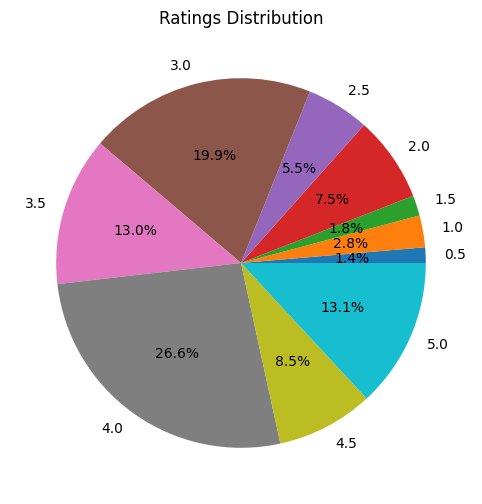

In [4]:
import matplotlib.pyplot as plt     # it is a library in python used for visualization and plotting purposes
                                    # plt is a used to visualize the data

# Plot ratings distribution
ratings_distribution = ratings['rating'].value_counts().sort_index()                       #index is used to give the name of the data
plt.figure(figsize=(8, 6))
plt.pie(ratings_distribution, labels=ratings_distribution.index, autopct='%1.1f%%')      # autopct is used to show the percentage of the data
plt.title("Ratings Distribution")
plt.show()


In [16]:
print(data.columns)   # verify column Names
print(movies.columns)
print(ratings.columns)

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')
Index(['movieId', 'title', 'genres'], dtype='object')
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


In [6]:
# Create a user-item matrix
user_item_matrix = data.pivot_table(index='userId', columns='title', values='rating')     # pivot is used to create a table

# Fill missing values with 0
user_item_matrix = user_item_matrix.fillna(0)     # fillna is a function used to fill the missing values with the given value
print(user_item_matrix.head())

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              0.0                                      0.0   
2              0.0                                      0.0   
3              0.0                                      0.0   
4              0.0                                      0.0   
5              0.0                                      0.0   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          0.0                  0.0   
2                          0.0                  0.0   
3                          0.0                  0.0   
4                          0.0                  0.0   
5                          0.0                  0.0   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                                               
1                             0.

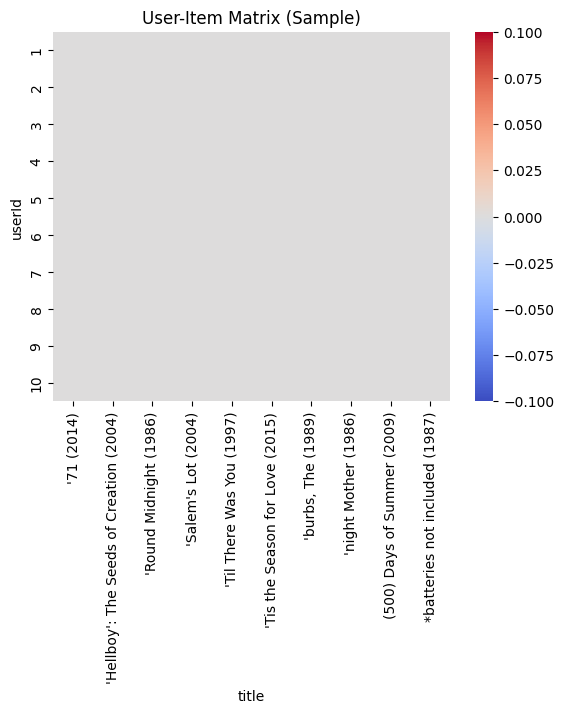

In [7]:
import seaborn as sns

sns.heatmap(user_item_matrix.iloc[:10, :10], cmap='coolwarm', annot=False)     # sns.heatmap is used to create a heatmap
plt.title("User-Item Matrix (Sample)")                                         # cmap is used to change the color of the heatmap
plt.show()

In [8]:
from sklearn.metrics.pairwise import cosine_similarity                # sklearn.metrics.pairwise is used to calculate the similarity between the data
                                                                      # cosine_similarity is a function used to calculate the cosine similarity between the data
#Transpose matrix for movie-to-movie similarity                       # Transpose is used to change the rows into columns and columns into rows
movie_similarity = cosine_similarity(user_item_matrix.T)

# Create a DataFrame for similarity
movie_similarity_df = pd.DataFrame(movie_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)
print(movie_similarity_df.head())


title                                    '71 (2014)  \
title                                                 
'71 (2014)                                      1.0   
'Hellboy': The Seeds of Creation (2004)         0.0   
'Round Midnight (1986)                          0.0   
'Salem's Lot (2004)                             0.0   
'Til There Was You (1997)                       0.0   

title                                    'Hellboy': The Seeds of Creation (2004)  \
title                                                                              
'71 (2014)                                                              0.000000   
'Hellboy': The Seeds of Creation (2004)                                 1.000000   
'Round Midnight (1986)                                                  0.707107   
'Salem's Lot (2004)                                                     0.000000   
'Til There Was You (1997)                                               0.000000   

title                    

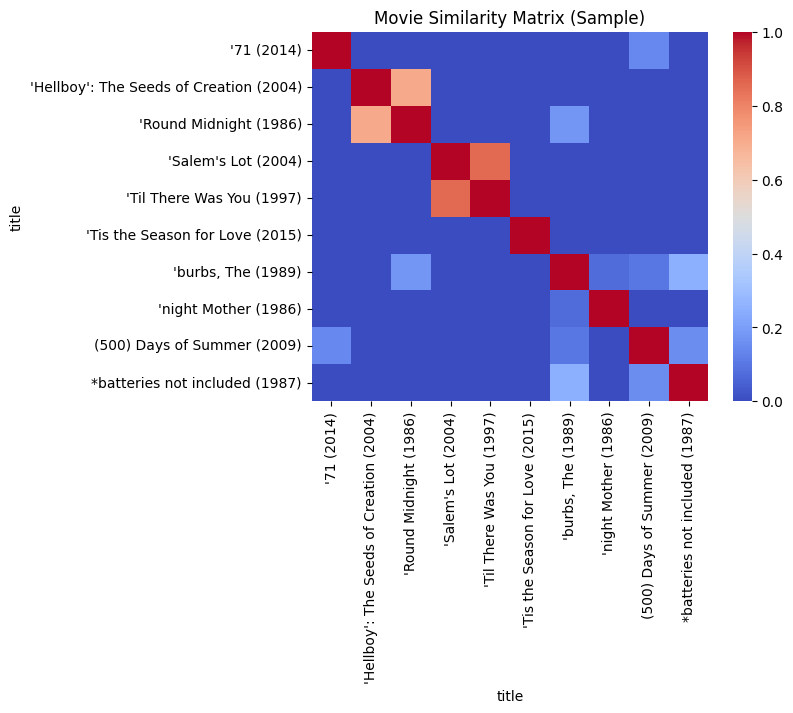

In [9]:
sns.heatmap(movie_similarity_df.iloc[:10, :10], cmap='coolwarm', annot=False)     # iloc is used to select the rows and columns from the data
plt.title("Movie Similarity Matrix (Sample)")
plt.show()


In [10]:
def recommend_movies(movie_name, similarity_matrix, top_n=5):
    # Check if the movie exists
    if movie_name not in similarity_matrix.index:
        return f"Movie '{movie_name}' not found in the dataset."

    # Get similarity scores for the movie
    similar_movies = similarity_matrix[movie_name].sort_values(ascending=False)[1:top_n+1]
    return similar_movies

# Test the function
recommended_movies = recommend_movies("Toy Story (1995)", movie_similarity_df)
print("Recommended Movies:\n", recommended_movies)


Recommended Movies:
 title
Toy Story 2 (1999)                           0.572601
Jurassic Park (1993)                         0.565637
Independence Day (a.k.a. ID4) (1996)         0.564262
Star Wars: Episode IV - A New Hope (1977)    0.557388
Forrest Gump (1994)                          0.547096
Name: Toy Story (1995), dtype: float64


In [11]:
def recommend_movies(movie_name, similarity_matrix, top_n=5):
    # Check if the movie exists
    if movie_name not in similarity_matrix.index:
        return f"Movie '{movie_name}' not found in the dataset."

    # Get similarity scores for the movie
    similar_movies = similarity_matrix[movie_name].sort_values(ascending=False)[1:top_n+1]
    return similar_movies

# Test the function
recommended_movies = recommend_movies("Toy Story (1995)", movie_similarity_df)
print("Recommended Movies:\n", recommended_movies)


Recommended Movies:
 title
Toy Story 2 (1999)                           0.572601
Jurassic Park (1993)                         0.565637
Independence Day (a.k.a. ID4) (1996)         0.564262
Star Wars: Episode IV - A New Hope (1977)    0.557388
Forrest Gump (1994)                          0.547096
Name: Toy Story (1995), dtype: float64


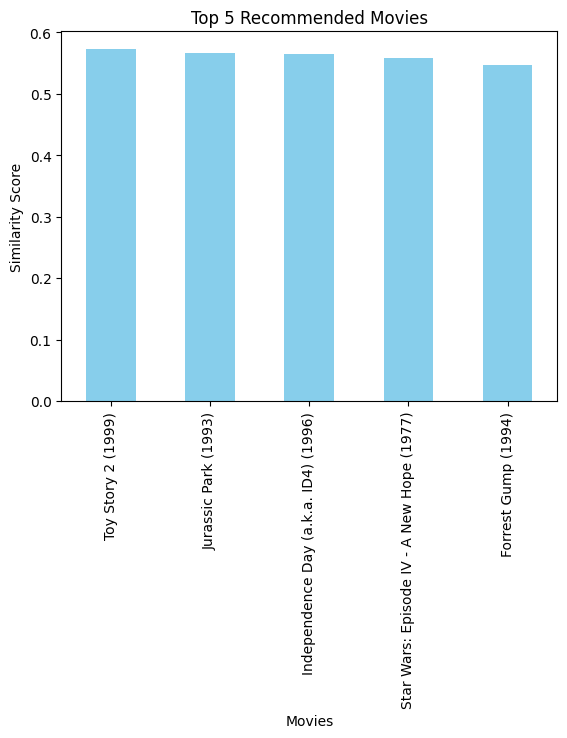

In [12]:
def plot_recommendations(recommendations):
    recommendations.plot(kind='bar', color='skyblue')
    plt.title("Top 5 Recommended Movies")
    plt.xlabel("Movies")
    plt.ylabel("Similarity Score")
    plt.show()

plot_recommendations(recommended_movies)
